In [1]:
from libraries import lib
import qutip as qt 
import torch
import numpy as np
import matplotlib.pyplot as plt
from kan import *

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [3]:
N, J = 5, 1
basis_state = 0
def amp_phase(nn_output):
    return nn_output[:, 0] * torch.exp(1.j * 2 * np.pi * nn_output[:, 1])

In [4]:
num_datapoints = 101
h_values = 10 ** np.linspace(-2, 2, num_datapoints)
gse_values = []
gs_0 = []
for h in h_values:
    hamilt = lib.TFIM_hamiltonian(N, J, h)
    eigs = hamilt.eigenstates()
    gse_values.append(eigs[0][0])
    gs_0.append(eigs[1][0][0][0])
gse_values = np.array(gse_values)
gs_0 = np.array(gs_0)

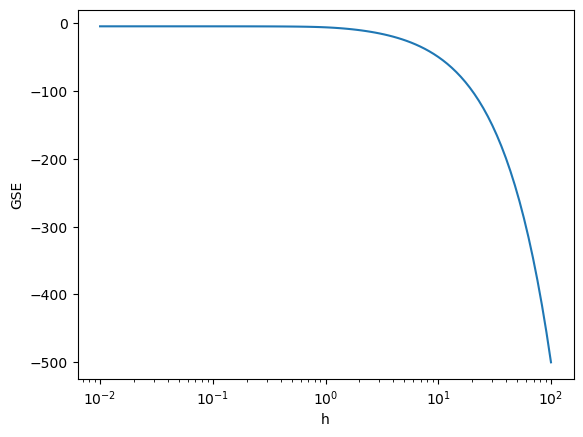

In [5]:
plt.plot(h_values, gse_values)
plt.xscale('log'); # plt.yscale('log')
plt.xlabel('h')
plt.ylabel('GSE')
plt.show()

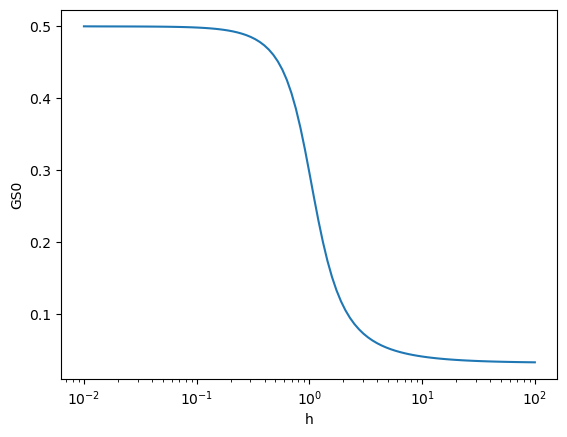

In [6]:
plt.plot(h_values, abs(gs_0) ** 2)
plt.xscale('log'); # plt.yscale('log')
plt.xlabel('h')
plt.ylabel('GS0')
plt.show()

In [7]:
print(gse_values)
print(abs(gs_0) ** 2)

[  -5.000125     -5.00015028   -5.00018068   -5.00021723   -5.00026117
   -5.00031399   -5.0003775    -5.00045386   -5.00054566   -5.00065603
   -5.00078873   -5.00094827   -5.00114009   -5.0013707    -5.00164797
   -5.00198134   -5.00238215   -5.00286406   -5.00344349   -5.00414017
   -5.00497785   -5.0059851    -5.00719628   -5.00865272   -5.01040418
   -5.01251056   -5.01504395   -5.01809121   -5.02175702   -5.0261676
   -5.03147527   -5.03786403   -5.04555643   -5.05482204   -5.06598805
   -5.07945252   -5.09570117   -5.11532889   -5.13906737   -5.16782114
   -5.20271492   -5.2451557    -5.29691437   -5.36023096   -5.43794582
   -5.53365165   -5.65184482   -5.79802555   -5.9786615    -6.20091911
   -6.47213595   -6.7991726    -7.18793209   -7.64328626   -8.16940128
   -8.77024683   -9.45006675  -10.21370954  -11.06682271  -12.01595753
  -13.06862901  -14.23336133  -15.51973533  -16.93844594  -18.5013727
  -20.22166469  -22.11383989  -24.1938994   -26.47945656  -28.98988163
  -31.74

In [8]:
from kan.utils import create_dataset
# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2, device=device)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

In [9]:
dataset['train_input'].dtype

torch.float32

In [10]:
train_input = torch.tensor(h_values.reshape(-1, 1), dtype=torch.float32)
train_label = torch.tensor((abs(gs_0)**2).reshape(-1, 1), dtype=torch.float32)
dataset = {'train_input': train_input, 'train_label': train_label, 
           'test_input': train_input, 'test_label': train_label}

In [11]:
train_input.dtype

torch.float32

checkpoint directory created: ./model
saving model version 0.0


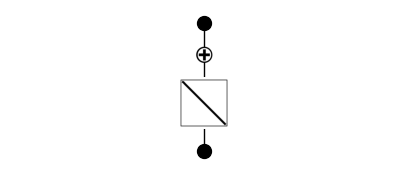

In [12]:
model_simple = KAN(width=[1, 1], device=device);
model_simple(dataset['train_input'])
model_simple.plot()

In [13]:
model_simple.fit(dataset, opt="LBFGS", steps=200);

| train_loss: 2.70e-02 | test_loss: 2.70e-02 | reg: 2.68e-01 | : 100%|█| 200/200 [00:04<00:00, 41.39

saving model version 0.1


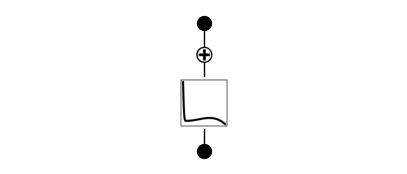

In [14]:
model_simple.plot()

In [15]:
model_simple.suggest_symbolic(0, 0, 0);

   function  fitting r2   r2 loss  complexity  complexity loss  total loss
0         0    0.000000  0.000014           0                0    0.000003
1       exp    0.995423 -7.768164           2                2    0.046367
2     1/x^2    0.986596 -6.220071           2                2    0.355986
3       1/x    0.976360 -5.401999           2                2    0.519600
4  gaussian    0.998147 -9.068350           3                3    0.586330


In [16]:
model_simple.fix_symbolic(0, 0, 0, 'exp')
model_simple.fit(dataset, opt = 'LBFGS', steps = 50);

r2 is 0.9954227805137634
saving model version 0.2


| train_loss: 2.83e-02 | test_loss: 2.83e-02 | reg: 0.00e+00 | : 100%|█| 50/50 [00:00<00:00, 67.49it

saving model version 0.3


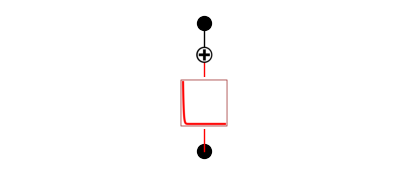

In [17]:
model_simple.plot()

In [18]:
ex_round(model_simple.symbolic_formula()[0][0],4)

0.0301 + 0.5023*exp(-0.6567*x_1)

In [19]:
c = 10
sig_function = 1/32 * (1/2 - 1/32) * (1 - 1/(1 + np.exp(-c * (np.log(h_values) - 1))))

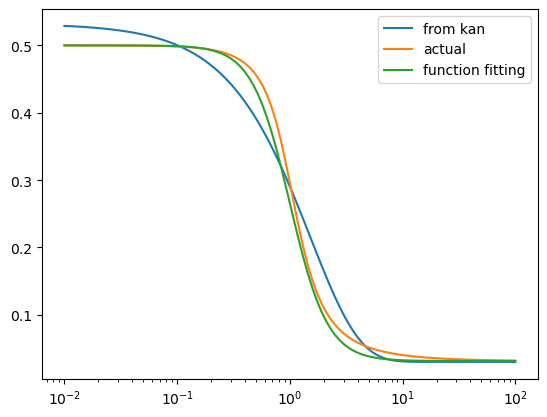

In [20]:
c = 6
sig_function = 1/32 + (1/2 - 1/32) * (1 - 1/(1 + np.exp(-c * np.log10(h_values))))
kan_pred = 0.03 + 0.5023 * np.exp(-0.6566 * h_values)
plt.plot(h_values, kan_pred, label = 'from kan')
plt.plot(h_values, abs(gs_0) ** 2, label = 'actual')
plt.plot(h_values, sig_function, label = 'function fitting')
plt.legend(loc = 'best')
plt.xscale('log')
plt.show()

In [28]:
model = KAN(width=[1, 2, 2, 1], device=device) 

checkpoint directory created: ./model
saving model version 0.0


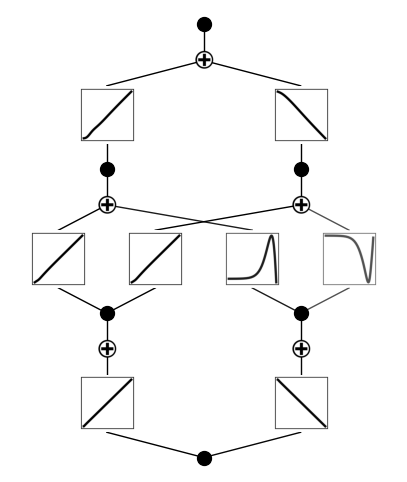

In [29]:
model(dataset['train_input'])
model.plot()

In [30]:
# train the model
model.fit(dataset, opt="LBFGS", steps=50, lamb=0.001);

| train_loss: 1.55e-02 | test_loss: 1.55e-02 | reg: 4.23e+00 | : 100%|█| 50/50 [00:07<00:00,  6.46it

saving model version 0.1


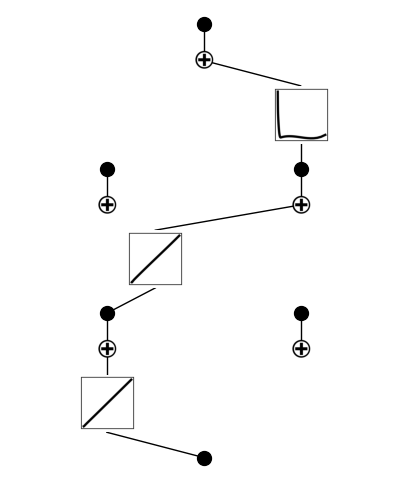

In [31]:
model.plot()

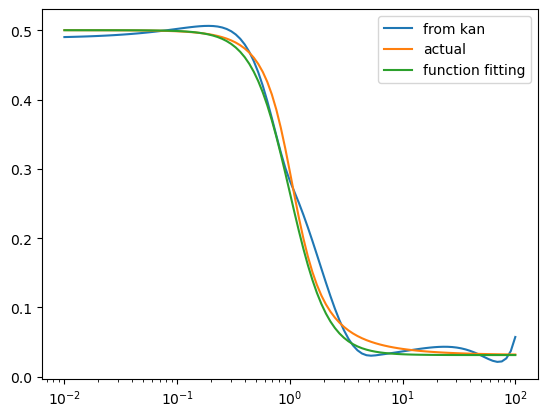

In [32]:
c = 6
sig_function = 1/32 + (1/2 - 1/32) * (1 - 1/(1 + np.exp(-c * np.log10(h_values))))
kan_pred = model(train_input).reshape(1, -1).detach()[0]
plt.plot(h_values, kan_pred, label = 'from kan')
plt.plot(h_values, abs(gs_0) ** 2, label = 'actual')
plt.plot(h_values, sig_function, label = 'function fitting')
plt.legend(loc = 'best')
plt.xscale('log')
plt.show()

saving model version 0.2


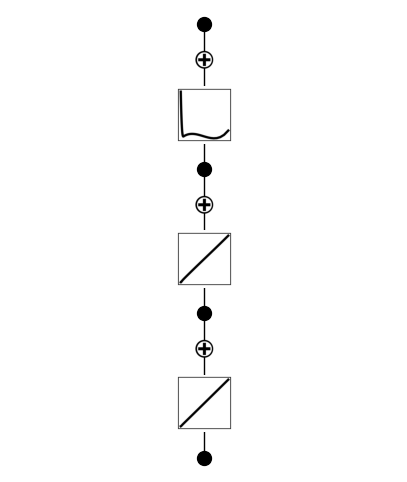

In [33]:
model = model.prune()
model.plot()

In [34]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 2.27e-03 | test_loss: 2.27e-03 | reg: 5.82e+00 | : 100%|█| 50/50 [00:04<00:00, 10.06it

saving model version 0.3


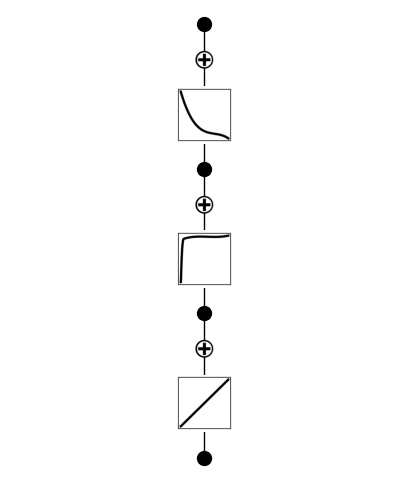

In [35]:
model.plot()

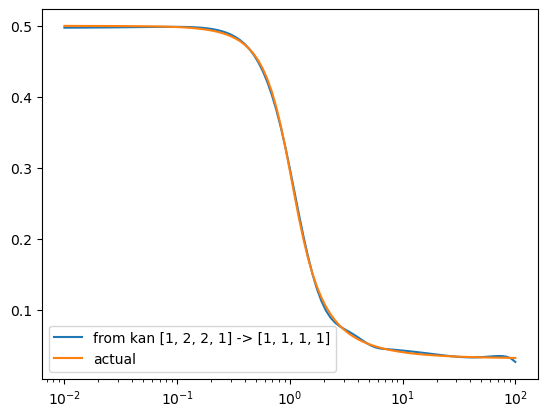

In [37]:
c = 6
sig_function = 1/32 + (1/2 - 1/32) * (1 - 1/(1 + np.exp(-c * np.log10(h_values))))
kan_pred = model(train_input).reshape(1, -1).detach()[0]
plt.plot(h_values, kan_pred, label = 'from kan [1, 2, 2, 1] -> [1, 1, 1, 1]')
plt.plot(h_values, abs(gs_0) ** 2, label = 'actual')
# plt.plot(h_values, sig_function, label = 'function fitting')
plt.legend(loc = 'best')
plt.xscale('log')
plt.show()

In [38]:
model.suggest_symbolic(2, 0, 0, topk=10);
model.suggest_symbolic(1, 0, 0, topk=10);
model.suggest_symbolic(0, 0, 0, topk=10);

    function  fitting r2    r2 loss  complexity  complexity loss  total loss
0        exp    0.999547 -11.078016           2                2   -0.615603
1      1/x^2    0.999392 -10.660738           2                2   -0.532148
2        1/x    0.999093 -10.091441           2                2   -0.418288
3  1/sqrt(x)    0.998629  -9.500044           2                2   -0.300009
4    1/x^0.5    0.998629  -9.500044           2                2   -0.300009
5        log    0.997260  -8.506308           2                2   -0.101262
6          x    0.939181  -4.039099           1                1   -0.007820
7          0    0.000000   0.000014           0                0    0.000003
8        x^2    0.994166  -7.418876           2                2    0.116225
9        cos    0.993787  -7.328130           2                2    0.134374
    function  fitting r2   r2 loss  complexity  complexity loss  total loss
0          0    0.000000  0.000014           0                0    0.000003
1

In [39]:
# lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
# lib = ['exp']
# model.auto_symbolic(lib=lib)
model.fix_symbolic(0, 0, 0, 'x')
model.fix_symbolic(1, 0, 0, 'exp')
model.fix_symbolic(2, 0, 0, 'exp')

r2 is 0.9999856352806091
saving model version 0.4
r2 is 0.9936395883560181
saving model version 0.5
r2 is 0.9995474219322205
saving model version 0.6


tensor(0.9995)

In [40]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 3.26e-02 | test_loss: 3.26e-02 | reg: 0.00e+00 | : 100%|█| 50/50 [00:01<00:00, 29.42it

saving model version 0.7


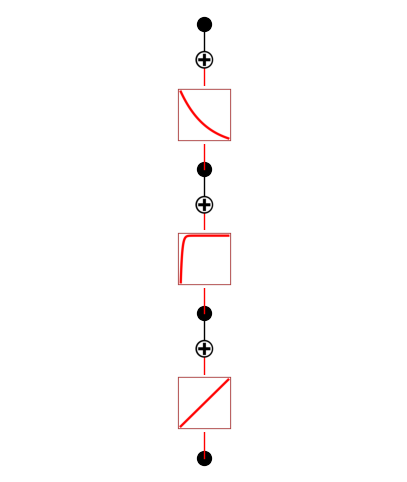

In [41]:
model.plot()

In [42]:
ex_round(model.symbolic_formula()[0][0],4)

0.0945*exp(1.8578*exp(-0.3318*x_1)) - 0.0706

In [43]:
sympy.lambdify('x_1', model.symbolic_formula()[0][0])(h_values)

array([0.53117289, 0.53081638, 0.53042585, 0.5299981 , 0.52952961,
       0.52901658, 0.52845482, 0.52783979, 0.52716655, 0.5264297 ,
       0.52562336, 0.52474116, 0.52377616, 0.52272083, 0.52156701,
       0.52030585, 0.51892777, 0.51742245, 0.51577872, 0.51398456,
       0.51202706, 0.50989236, 0.50756561, 0.50503097, 0.50227158,
       0.49926954, 0.49600592, 0.49246079, 0.48861324, 0.4844415 ,
       0.47992299, 0.47503446, 0.4697522 , 0.46405222, 0.45791057,
       0.45130361, 0.44420848, 0.43660351, 0.42846879, 0.41978675,
       0.41054284, 0.4007263 , 0.39033092, 0.37935586, 0.36780655,
       0.35569546, 0.34304296, 0.32987795, 0.31623847, 0.30217208,
       0.28773598, 0.27299685, 0.25803044, 0.24292062, 0.22775826,
       0.21263955, 0.19766414, 0.18293285, 0.16854533, 0.15459756,
       0.14117938, 0.12837225, 0.11624732, 0.10486382, 0.09426807,
       0.08449287, 0.07555752, 0.06746823, 0.0602189 , 0.05379222,
       0.04816083, 0.04328858, 0.03913173, 0.03564005, 0.03275

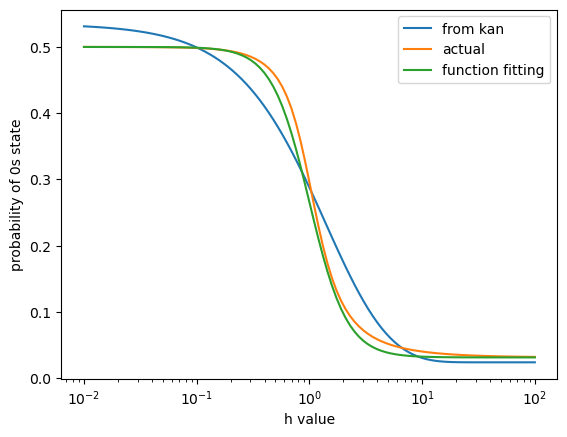

In [45]:
c = 6
sig_function = 1/32 + (1/2 - 1/32) * (1 - 1/(1 + np.exp(-c * np.log10(h_values))))
kan_pred = lambdify('x_1', model.symbolic_formula()[0][0])(h_values)
plt.plot(h_values, kan_pred, label = 'from kan')
plt.plot(h_values, abs(gs_0) ** 2, label = 'actual')
plt.plot(h_values, sig_function, label = 'function fitting')
plt.legend(loc = 'best')
plt.xscale('log')
plt.xlabel('h value'); plt.ylabel('probability of 0s state')
plt.show()

In [58]:
model_log = KAN(width = [1, 1, 1], device=device)
model_log(train_input)
model_log.fix_symbolic(0, 0, 0, 'log')
model_log.fit(dataset, opt='LBFGS', steps=50);

checkpoint directory created: ./model
saving model version 0.0
Best value at boundary.
r2 is 0.9801102876663208
saving model version 0.1


| train_loss: 9.91e-03 | test_loss: 9.91e-03 | reg: 1.04e-01 | : 100%|█| 50/50 [00:02<00:00, 23.06it


saving model version 0.2


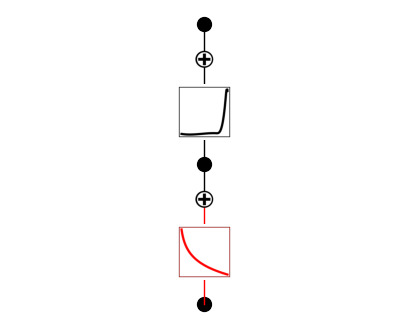

In [59]:
model_log.plot()

In [60]:
model_log.suggest_symbolic(1, 0, 0);

   function  fitting r2   r2 loss  complexity  complexity loss  total loss
0         0    0.000000  0.000014           0                0    0.000003
1       exp    0.978535 -5.541182           2                2    0.491764
2         x    0.627427 -1.424368           1                1    0.515126
3  gaussian    0.997761 -8.796661           3                3    0.640668
4     1/x^2    0.963202 -4.763839           2                2    0.647232


In [61]:
model_log.fix_symbolic(1, 0, 0, 'exp')
model_log.fit(dataset, opt='LBFGS', steps=50);

r2 is 0.9785347580909729
saving model version 0.3


description:   0%|                                                           | 0/50 [00:00<?, ?it/s]

| train_loss: 3.29e-02 | test_loss: 3.29e-02 | reg: 0.00e+00 | : 100%|█| 50/50 [00:00<00:00, 51.07it

saving model version 0.4


In [63]:
ex_round(model_log.symbolic_formula()[0][0], 4)

0.513/(0.2301*x_1 + 1)**3.2885 + 0.024

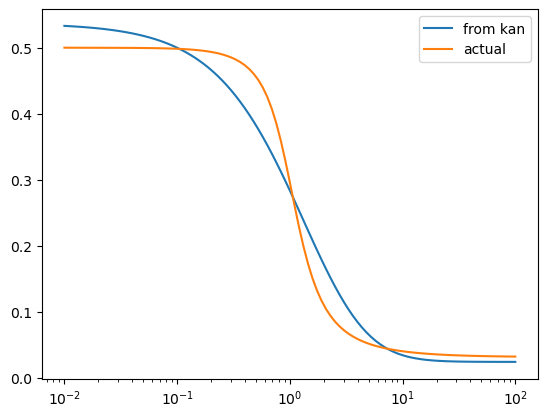

In [64]:
kan_pred = lambdify('x_1', model_log.symbolic_formula()[0][0])(h_values)
plt.plot(h_values, kan_pred, label = 'from kan')
plt.plot(h_values, abs(gs_0) ** 2, label = 'actual')
plt.legend(loc = 'best')
plt.xscale('log')
plt.show()

In [ ]:
model_log = KAN(width = [1, 1, 1], device=device)
model_log(train_input)
model_log.fix_symbolic(0, 0, 0, 'log')
model_log.fit(dataset, opt='LBFGS', steps=50);